<a href="https://colab.research.google.com/github/fzanart/Socialz/blob/main/anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive/')
import json
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.manifold import TSNE

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [7]:
df = pd.read_csv('/content/drive/MyDrive/Socialz/cobol_pullrequests.csv')
df

,type,login,name,created_at,payload,lang,event,user_login,user_type,url,commits,additions,deletions,changed_files
0,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 15:38:18 UTC,"{""action"":""closed"",""number"":3,""pull_request"":{...","""COBOL""","""closed""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/3""",1,2,2,1
1,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 15:28:12 UTC,"{""action"":""opened"",""number"":3,""pull_request"":{...","""COBOL""","""opened""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/3""",1,2,2,1
2,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 16:19:54 UTC,"{""action"":""closed"",""number"":4,""pull_request"":{...","""COBOL""","""closed""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/4""",1,23,11,1
3,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 15:37:56 UTC,"{""action"":""opened"",""number"":4,""pull_request"":{...","""COBOL""","""opened""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/4""",1,23,11,1
4,PullRequestEvent,mavimaec,vimaec/g3d,2021-11-19 20:40:52 UTC,"{""action"":""closed"",""number"":8,""pull_request"":{...","""COBOL""","""closed""","""mavimaec""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/8""",2,113,702,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-05-14 03:43:29 UTC,"{""action"":""closed"",""number"":115,""pull_request""...","""COBOL""","""closed""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",1,688,1,39
1329,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-12-06 17:56:00 UTC,"{""action"":""closed"",""number"":127,""pull_request""...","""COBOL""","""closed""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",1,506,0,15
1330,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-11-30 22:12:33 UTC,"{""action"":""opened"",""number"":127,""pull_request""...","""COBOL""","""opened""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",1,506,0,15
1331,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-12-09 04:01:35 UTC,"{""action"":""closed"",""number"":128,""pull_request""...","""COBOL""","""closed""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",1,5,1,1


In [8]:
len(df['login'].unique())

145

In [9]:
def text_lenght(text):

    if text == None:

        return 0
    else:

        return len(text)

df['payload'] = df['payload'].apply(json.loads)
df['merged'] = df['payload'].apply(lambda x: x.get('pull_request').get('merged'))
df['comments'] = df['payload'].apply(lambda x: x.get('pull_request').get('comments'))
df['review_comments'] = df['payload'].apply(lambda x: x.get('pull_request').get('review_comments'))
df['title lenght'] = df['payload'].apply(lambda x: text_lenght(x.get('pull_request').get('title')))
df['body lenght'] = df['payload'].apply(lambda x: text_lenght(x.get('pull_request').get('body')))
#df['total LOC'] = df['additions'] + df['deletions']

In [10]:
df

,type,login,name,created_at,payload,lang,event,user_login,user_type,url,commits,additions,deletions,changed_files,merged,comments,review_comments,title lenght,body lenght
0,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 15:38:18 UTC,"{'action': 'closed', 'number': 3, 'pull_reques...","""COBOL""","""closed""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/3""",1,2,2,1,False,0,0,15,0
1,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 15:28:12 UTC,"{'action': 'opened', 'number': 3, 'pull_reques...","""COBOL""","""opened""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/3""",1,2,2,1,False,0,0,15,0
2,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 16:19:54 UTC,"{'action': 'closed', 'number': 4, 'pull_reques...","""COBOL""","""closed""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/4""",1,23,11,1,True,0,0,12,83
3,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 15:37:56 UTC,"{'action': 'opened', 'number': 4, 'pull_reques...","""COBOL""","""opened""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/4""",1,23,11,1,False,0,0,12,83
4,PullRequestEvent,mavimaec,vimaec/g3d,2021-11-19 20:40:52 UTC,"{'action': 'closed', 'number': 8, 'pull_reques...","""COBOL""","""closed""","""mavimaec""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/8""",2,113,702,16,True,0,0,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-05-14 03:43:29 UTC,"{'action': 'closed', 'number': 115, 'pull_requ...","""COBOL""","""closed""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",1,688,1,39,True,0,0,75,155
1329,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-12-06 17:56:00 UTC,"{'action': 'closed', 'number': 127, 'pull_requ...","""COBOL""","""closed""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",1,506,0,15,True,0,1,65,114
1330,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-11-30 22:12:33 UTC,"{'action': 'opened', 'number': 127, 'pull_requ...","""COBOL""","""opened""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",1,506,0,15,False,0,0,65,0
1331,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-12-09 04:01:35 UTC,"{'action': 'closed', 'number': 128, 'pull_requ...","""COBOL""","""closed""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",1,5,1,1,True,0,0,52,1092


In [54]:
columns = ['merged', 'commits', 'additions', 'deletions','changed_files', 'comments', 'review_comments','title lenght', 'body lenght']

def outlier_detection(df, user):
  
  # get train / test data by user
  X_train = df[(df['merged'] == True) & (df['login'] == user)]
  X_train = X_train[columns]

  X_test = df[(df['merged'] == False) & (df['login'] == user)]
  X_test = X_test[columns]

  # fit predict isolation forest algorithm for outlier detection
  clf = IsolationForest(max_samples='auto', n_jobs=-1, random_state=42)
  clf.fit(X_train)
  y_pred_train = clf.fit_predict(X_train)
  y_pred_test = clf.predict(X_test)

  # Concatenate train / test data with outlier predictions
  anomaly = np.concatenate([y_pred_train,y_pred_test])
  data = pd.concat([X_train, X_test])
  data['Anomaly'] = anomaly
  
  # Add 2D representation of the data
  tsne = TSNE(n_components=2, random_state=0)
  projections = tsne.fit_transform(data[columns])
  data['X'] = projections[:,0]
  data['y'] = projections[:,1]

  # return the data
  data = data.reset_index(drop=True)
  return data

In [68]:
# plt.legend([a, b, c],["training observations", "new regular observations", "new abnormal observations"],loc="upper left")
# subplot(nrows, ncols, index, **kwargs)

def plot_data(data):

  fig,axs = plt.subplots(3,3,sharex=False, sharey=False,figsize=(15,15))

  indices_a = data[data['merged'] == True].index                                # Select training observations
  indices_b = data[(data['merged'] == False) & (data['Anomaly'] == 1)].index    # Select new regular observations
  indices_c = data[(data['merged'] == False) & (data['Anomaly'] == -1)].index   # Select new abnormal observations
  a = axs.ravel()[0].scatter(data['X'].loc[indices_a], data['y'].loc[indices_a] , c="white", s=20, edgecolor="k")
  b = axs.ravel()[0].scatter(data['X'].loc[indices_b], data['y'].loc[indices_b] , c="green", s=20, edgecolor="k")
  c = axs.ravel()[0].scatter(data['X'].loc[indices_c], data['y'].loc[indices_c] , c="red", s=20, edgecolor="k")
  axs.ravel()[0].legend([a, b, c],["training observations", "new regular observations", "new abnormal observations"],loc="best")

  for column, ax in zip(columns[1:], axs.ravel()[1:]):

    markers_on = data[(data['merged'] == False) & (data['Anomaly'] == -1)].index.to_list()
    train_mark = len(data[data['merged'] == True])

    ax.plot(data[column])
    ax.axvline(x=train_mark, color='green', ls=':', lw=2)
    ax.plot(data[column], 'ro', markevery=markers_on)
    ax.title.set_text(column)

  out = plt.show()

  return out


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


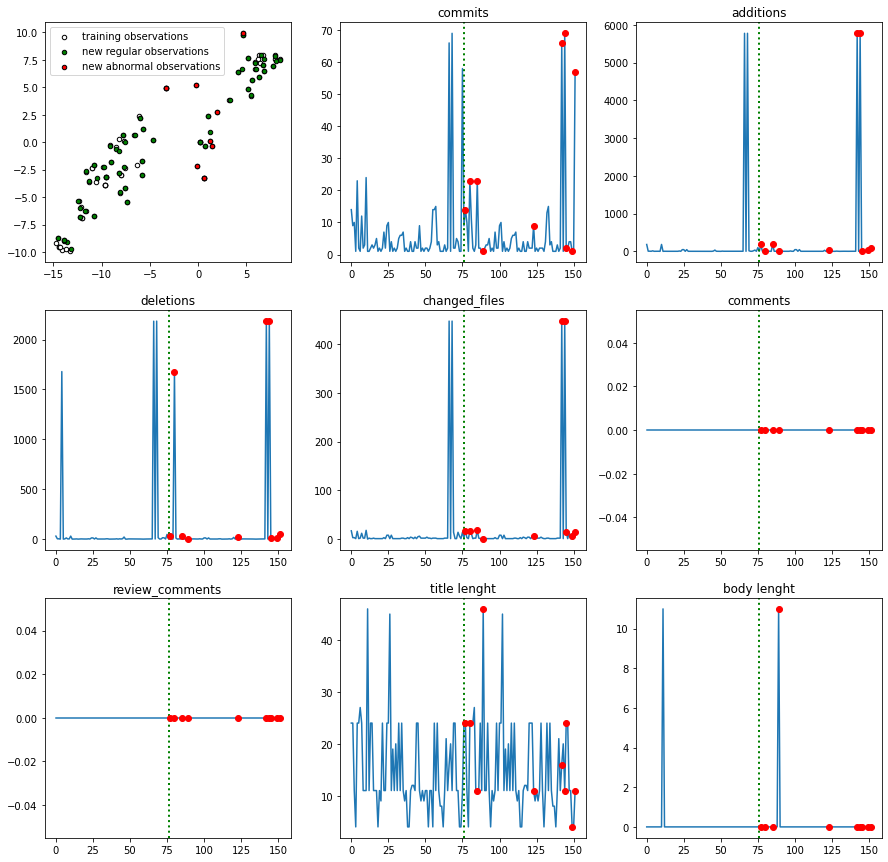

In [70]:
plot_data(outlier_detection(df, 'ralphnuessecpwr'))